1.tensor实现二分神经网络的正向传播

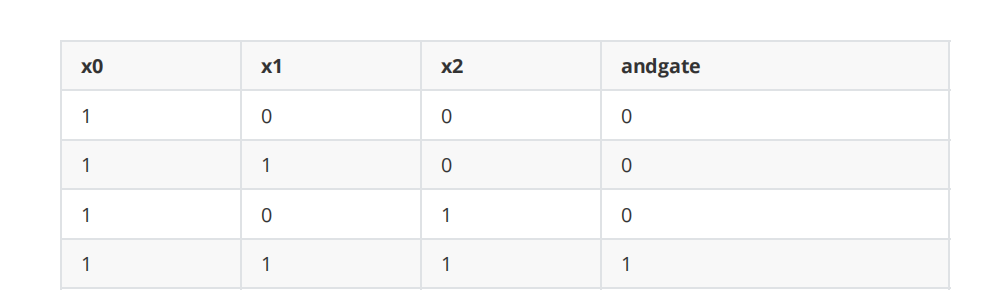

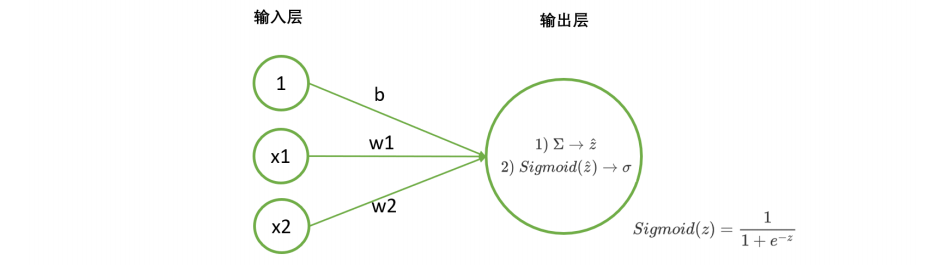

In [ ]:
#1.1采用sigmoid实现与门
# 导入PyTorch库
import torch

# 定义输入数据X，其中每一行是一个样本，第一列是偏置项(恒为1)，后两列是输入特征
# 这是AND逻辑门的全部可能输入组合(包括偏置项)
X = torch.tensor([
    [1, 0, 0],  # 样本1: 偏置=1, x1=0, x2=0
    [1, 1, 0],  # 样本2: 偏置=1, x1=1, x2=0 
    [1, 0, 1],  # 样本3: 偏置=1, x1=0, x2=1
    [1, 1, 1]   # 样本4: 偏置=1, x1=1, x2=1
], dtype=torch.float32)

# AND逻辑门的真实输出标签(只有x1和x2都为1时输出1)
andgate = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

# 手动设置的权重向量:
# w[0] = -0.2 (偏置项的权重)
# w[1] = 0.15 (x1的权重)
# w[2] = 0.15 (x2的权重)
w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)

def LogisticR(X, w):
    # 1. 计算线性部分: zhat = X * w (矩阵向量乘法)
    #    对于每个样本: zhat = w0*1 + w1*x1 + w2*x2
    zhat = torch.mv(X, w)
    
    # 2. 应用Sigmoid激活函数，将输出压缩到(0,1)区间
    #    两种等价写法:
    #    sigma = 1/(1+torch.exp(-zhat))  # 手动实现
    #    sigma = torch.sigmoid(zhat)      # 使用PyTorch内置函数
    sigma = 1/(1+torch.exp(-zhat))
    
    # 3. 根据阈值0.5将概率输出转换为二分类结果(0或1)
    #    如果sigma >= 0.5，输出1，否则输出0
    #    使用列表推导式将布尔值转换为整数(True→1, False→0)
    andhat = torch.tensor([int(x) for x in sigma >= 0.5], dtype=torch.float32)
    
    # 返回Sigmoid输出和二进制分类结果
    return sigma, andhat

# 调用函数并打印结果
sigma, andhat = LogisticR(X, w)
print("Sigmoid输出:", sigma)
print("预测标签:", andhat)

Sigmoid输出: tensor([0.4502, 0.4875, 0.4875, 0.5250])
预测标签: tensor([0., 0., 0., 1.])


In [ ]:
#1.2采用sign实现与门
# 导入PyTorch库
import torch

# 定义输入数据X，其中每一行是一个样本，第一列是偏置项(恒为1)，后两列是输入特征
# 这是AND逻辑门的全部可能输入组合(包括偏置项)
X = torch.tensor([
    [1, 0, 0],  # 样本1: 偏置=1, x1=0, x2=0
    [1, 1, 0],  # 样本2: 偏置=1, x1=1, x2=0
    [1, 0, 1],  # 样本3: 偏置=1, x1=0, x2=1
    [1, 1, 1]   # 样本4: 偏置=1, x1=1, x2=1
], dtype=torch.float32)

# 定义权重向量:
# w[0] = -0.2 (偏置项的权重)
# w[1] = 0.15 (x1的权重)
# w[2] = 0.15 (x2的权重)
w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)

# AND逻辑门的真实输出标签(只有x1和x2都为1时输出1)
andgate = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

def LinearRwithsign(X, w):
    """
    使用sign函数(符号函数)实现的线性分类器
    参数:
        X: 输入特征矩阵
        w: 权重向量
    返回:
        andhat: 预测的类别标签(0或1)
    """
    # 1. 计算线性部分: zhat = X * w (矩阵向量乘法)
    #    对于每个样本: zhat = w0*1 + w1*x1 + w2*x2
    zhat = torch.mv(X, w)
    
    # 2. 应用sign函数(通过阈值判断实现)
    #    如果zhat >= 0，输出1，否则输出0
    #    使用列表推导式将布尔值转换为整数(True→1, False→0)
    andhat = torch.tensor([int(x) for x in zhat >= 0], dtype=torch.float32)
    
    return andhat

# 调用函数并打印结果
andhat = LinearRwithsign(X, w)
print("预测标签:", andhat)


预测标签: tensor([0., 0., 0., 1.])


In [ ]:
#1.3采用torch.nn.functional实现单层二分类网络正向传播,运用sigmoid
import torch
from torch.nn import functional as F

# 1. 定义输入数据 X
X = torch.tensor([[0,0], [1,0], [0,1], [1,1]], dtype=torch.float32)
# 这是一个4x2的张量，表示4个样本，每个样本有2个特征
# 这实际上是逻辑门问题的所有可能输入组合

# 2. 设置随机种子
torch.random.manual_seed(420)
# 设置随机种子为420，确保每次运行代码时随机初始化结果相同

# 3. 定义一个全连接层
dense = torch.nn.Linear(2, 1)
#linear_layer = torch.nn.Linear(in_features, out_features, bias=True)
# 创建一个线性层(全连接层)，输入维度是2，输出维度是1
# 这会自动初始化权重矩阵W(1x2)和偏置b(1x1)

# 4. 前向传播计算
zhat = dense(X)
# 计算线性变换：zhat = XW^T + b
# 其中W是权重，b是偏置

# 5.使用sigmoid函数
sigma = F.sigmoid(zhat)

# 6.
y = torch.tensor([int(x) for x in sigma >= 0.5], dtype=torch.float32)
# 根据阈值0.5将概率输出转换为二分类结果(0或1)
# sigma >= 0.5 -> 1, 否则 -> 0
y

tensor([1., 1., 1., 1.])

In [ ]:
#1.3采用torch.nn.functional实现单层二分类网络正向传播,运用sign
import torch
from torch.nn import functional as F
X=torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
torch.random.manual_seed(420)
tense=torch.nn.Linear(2,1)
zhat=tense(X)
y=torch.sign(zhat)#同理relu:torch.rulu(zhat);torch.tanh(zhat)
print(y)
print(zhat)

tensor([[1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SignBackward0>)
tensor([[0.6730],
        [1.1048],
        [0.2473],
        [0.6792]], grad_fn=<AddmmBackward0>)


In [ ]:
#1.4采用torch.nn.functional实现单层二分类网络正向传播,运用relu
import torch
from torch.nn import functional as F
X=torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32)
torch.random.manual_seed(420)
tense=torch.nn.Linear(2,1)
zhat=tense(X)
y=torch.relu(zhat)
print(y)
print(zhat)

tensor([[0.6730],
        [1.1048],
        [0.2473],
        [0.6792]], grad_fn=<ReluBackward0>)
tensor([[0.6730],
        [1.1048],
        [0.2473],
        [0.6792]], grad_fn=<AddmmBackward0>)
